In [14]:
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
import pickle


In [15]:
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    return data

In [16]:
data_path = "../data/raw/cifar-10-batches-py/"

dict = load_data(data_path + "data_batch_1")
dict = dict | load_data(data_path + "data_batch_2")
dict = dict | load_data(data_path + "data_batch_3")
dict = dict | load_data(data_path + "data_batch_4")
dict = dict | load_data(data_path + "data_batch_5")
dict.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [17]:
dict_test = load_data(data_path + "test_batch")

In [18]:
def to_image(img_flat):
    img_R = img_flat[0:1024].reshape((32, 32))
    img_G = img_flat[1024:2048].reshape((32, 32))
    img_B = img_flat[2048:3072].reshape((32, 32))
    img = np.dstack((img_R, img_G, img_B))
    return img

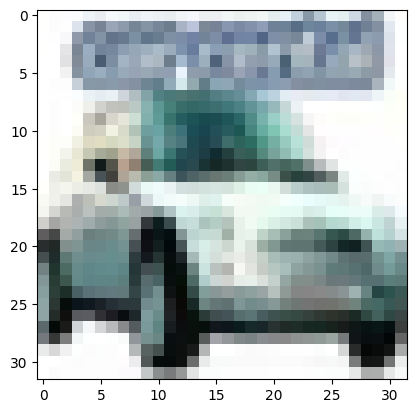

In [25]:
X_train = np.array(dict[b'data']).reshape(-1, 32, 32, 3) / 255.0
y_train = np.array(dict[b'labels'])
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = [to_image(img) for img in X_train]

plt.imshow(X_train[0])

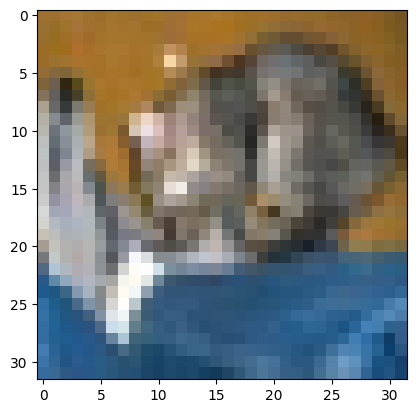

In [26]:
X_test = np.array(dict_test[b'data']).reshape(-1, 32, 32, 3) / 255.0
y_test = np.array(dict_test[b'labels'])
X_test = X_test.reshape(X_test.shape[0], -1)
X_test = [to_image(img) for img in X_test]


plt.imshow(X_test[0])

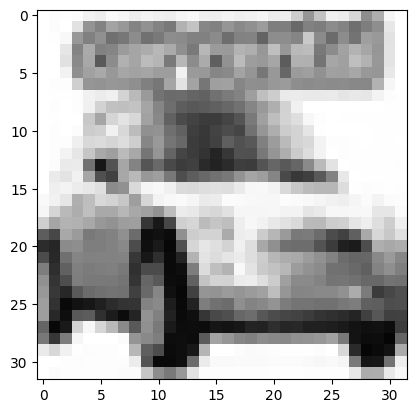

In [27]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(X_train[0])    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

Last accuracy values :
- random_forest : acc: 0.47 / cross_val: 0.41
- svm : acc: 0.22 / cross_val: 0.33
- logistic_regression : acc: 0.41 / cross_val: 0.37
- knn : acc: 0.34 / cross_val: 0.29

Last accuracy values on validation data without feature extraction :
- random_forest : acc: 0.48
- svm : acc: 0.41
- logistic_regression : acc: 0.52
- knn : acc: 0.51

Last accuracy values with hog :
- random_forest : acc: 0.48 / cross_val: 0.46
- svm : acc: 0.40 / cross_val: 0.47
- logistic_regression : acc: 0.53 / cross_val: 0.51
- knn : acc: 0.51 / cross_val: 0.44

Last accuracy values with flatten :
- random_forest : acc: 0.42 / cross_val: 0.40
- svm : acc: 0.24 / cross_val: 0.33
- logistic_regression : acc: 0.40 / cross_val: 0.37
- knn : acc: 0.33 / cross_val: 0.29

Last accuracy values with sift :
- random_forest : acc: 0.10 / cross_val: 0.40
- svm : acc: 0.10 / cross_val: 0.33
- logistic_regression : acc: 0.10 / cross_val: 0.37
- knn : acc: 0.10 / cross_val: 0.29

Last accuracy values with vlad :
- random_forest : acc: 0.28 / cross_val: 0.40
- svm : acc: 0.16 / cross_val: 0.33
- logistic_regression : acc: 0.22 / cross_val: 0.37
- knn : acc: 0.21 / cross_val: 0.29

- vlad
- Montrer qu'on comprend ce qu'on utilise
- Montrer les images de chaque résultats
- Analyse qualitative des résultats

Classification binaire et multi-classe : https://kobia.fr/classification-metrics-multi-class-simple/#:~:text=Cas%20multi-classe%20%3A%20une%20probabilité,d%27être%20lever%20de%20Soleil

Preprocessing data : https://scikit-learn.org/stable/modules/preprocessing.html

Classifier Comparison : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Histogram of Oriented Gradients : https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

Colormap : https://matplotlib.org/stable/users/explain/colors/colormaps.html

Histogram of Colors : https://datacorner.fr/image-processing-2/

Corner Detection : https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_corner.html#sphx-glr-auto-examples-features-detection-plot-corner-py

Contrast image : 
- Lab color space : https://www.xrite.com/blog/lab-color-space
- code : https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv

Vlad : https://github.com/tim-hilt/vlad/blob/master/vlad/vlad.py

Exemple de détections de features : https://scikit-image.org/docs/dev/auto_examples/features_detection/index.html